### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή:Παύλος Σκούρτης

Α.Μ.:03120052

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [14]:
import numpy as np

# Load hyperspectral image
image_file = '/content/indian_pines_corrected.npy'
image_data = np.load(image_file)

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [15]:
import numpy as np

# Load annotations
annotations_file = '/content/indian_pines_gt.npy'
annotations_data = np.load(annotations_file)

# Display shape of the loaded annotations data
print("Shape of annotations:", annotations_data.shape)

# Define class labels
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Flatten the annotations_data array
annotations_data_flat = annotations_data.flatten()

# Display unique values in the flattened annotations data to verify they match the class labels
unique_values = np.unique(annotations_data_flat)
print("Unique values in annotations:", unique_values)

# Convert annotations_data_flat to integers
annotations_data_flat = annotations_data_flat.astype(int)

# Assign class labels based on the provided classes list
annotations_labels = [classes[value] for value in annotations_data_flat]

# Reshape the annotations_labels array to match the original shape of annotations_data
annotations_labels = np.array(annotations_labels).reshape(annotations_data.shape)

# Display shape of the loaded annotations labels
print("Shape of annotations labels:", annotations_labels.shape)


Shape of annotations: (145, 145)
Unique values in annotations: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Shape of annotations labels: (145, 145)


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

Height of the image: 145
Width of the image: 145
Number of hyperspectral channels: 200


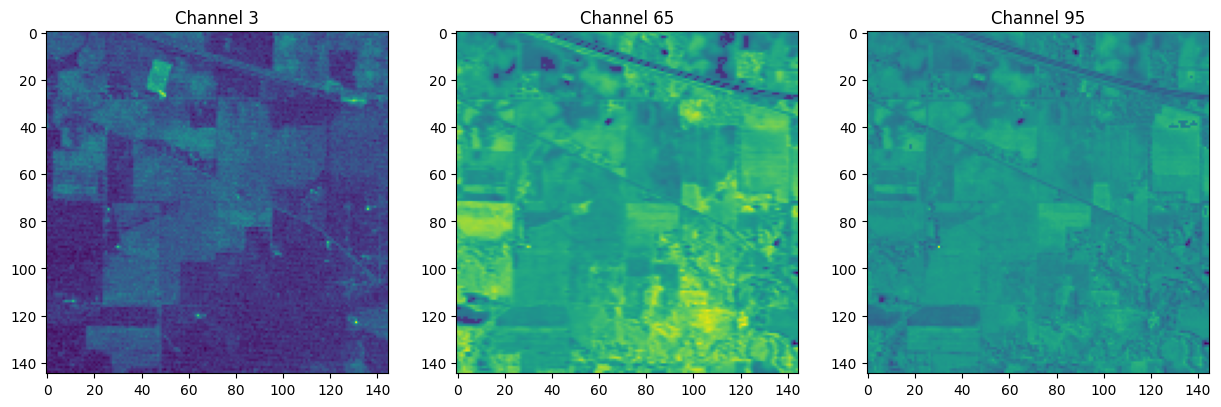

Number of different crop/class categories: 17


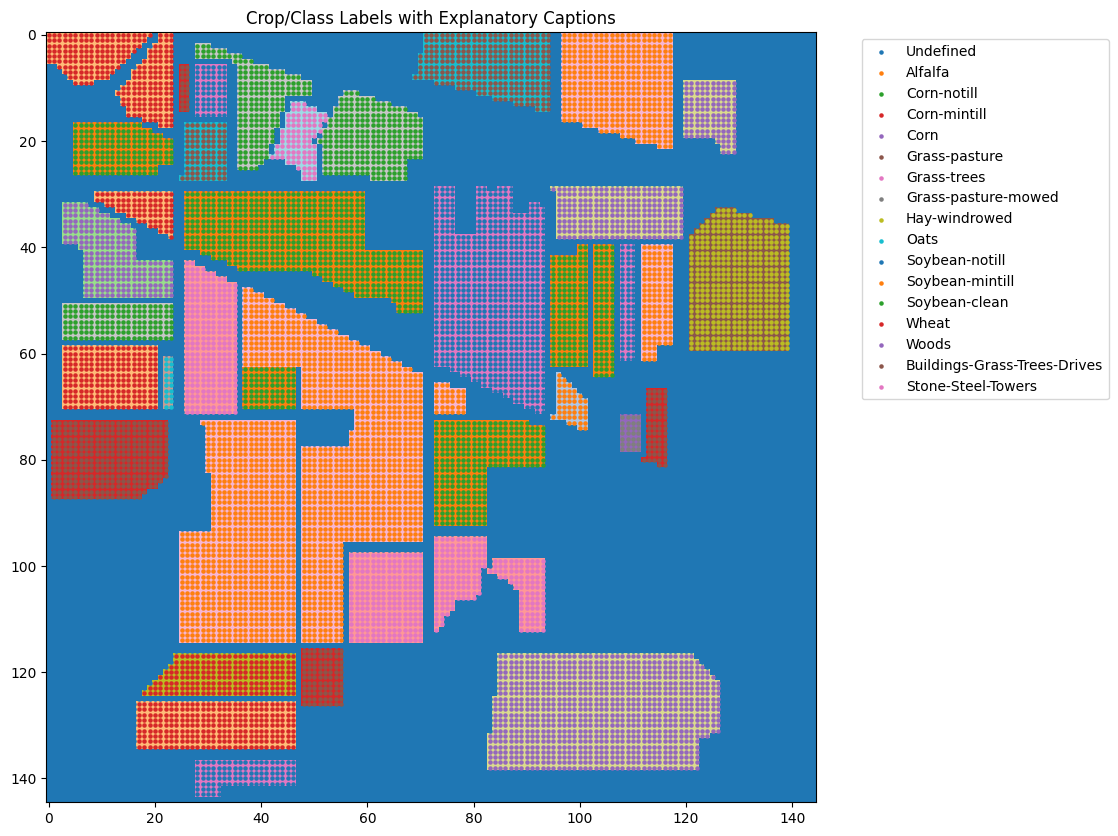

Class Undefined: 10776 pixels
Class Alfalfa: 46 pixels
Class Corn-notill: 1428 pixels
Class Corn-mintill: 830 pixels
Class Corn: 237 pixels
Class Grass-pasture: 483 pixels
Class Grass-trees: 730 pixels
Class Grass-pasture-mowed: 28 pixels
Class Hay-windrowed: 478 pixels
Class Oats: 20 pixels
Class Soybean-notill: 972 pixels
Class Soybean-mintill: 2455 pixels
Class Soybean-clean: 593 pixels
Class Wheat: 205 pixels
Class Woods: 1265 pixels
Class Buildings-Grass-Trees-Drives: 386 pixels
Class Stone-Steel-Towers: 93 pixels


In [16]:
#2a
import numpy as np

# Get dimensions of the image
height, width, channels = image_data.shape

# Display information
print("Height of the image:", height)
print("Width of the image:", width)
print("Number of hyperspectral channels:", channels)
#2b
import matplotlib.pyplot as plt

# Channels to plot
channels_to_plot = [2, 64, 94]  # Adjusted to 0-based indexing

# Plot the selected channels
plt.figure(figsize=(15, 5))

for i, channel in enumerate(channels_to_plot, 1):
    plt.subplot(1, len(channels_to_plot), i)
    plt.imshow(image_data[:, :, channel], cmap='viridis')  # You can choose a different colormap
    plt.title(f'Channel {channel + 1}')  # Adding 1 to convert to 1-based indexing

plt.show()
#2c
# Count the number of unique classes
num_unique_classes = len(np.unique(annotations_data_flat))

# Display the number of different crop/class categories
print("Number of different crop/class categories:", num_unique_classes)
#2d
# Plot the labels in image format
plt.figure(figsize=(10, 10))
plt.imshow(annotations_data, cmap='tab20', vmin=0, vmax=len(classes)-1)

# Add explanatory captions
for class_value, class_name in enumerate(classes):
    if class_value not in np.unique(annotations_data):
        continue
    y, x = np.where(annotations_data == class_value)
    plt.scatter(x, y, label=class_name, s=5)

# Customize plot
plt.title("Crop/Class Labels with Explanatory Captions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#2e
# Count occurrences of each unique class
unique_classes, class_counts = np.unique(annotations_data_flat, return_counts=True)

# Display the number of pixels for each class
for class_value, count in zip(unique_classes, class_counts):
    class_name = classes[class_value]
    print(f"Class {class_name}: {count} pixels")


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [17]:

# Flatten the image and annotations data
image_data_flat = image_data.reshape(-1, channels)

# Find indices where the label is not Undefined
valid_indices = np.where(annotations_data_flat != 0)

# Filter out Undefined data
filtered_image_data = image_data_flat[valid_indices]
filtered_annotations_data = annotations_data_flat[valid_indices]

# Display shapes of the converted data
print("Shape of converted image data:", filtered_image_data.shape)
print("Shape of converted annotations data:", filtered_annotations_data.shape)


Shape of converted image data: (10249, 200)
Shape of converted annotations data: (10249,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [18]:
import random

# Define a seed for reproducibility
seed_value = 42
np.random.seed(seed_value)

# Find unique labels in the filtered annotations data
unique_labels = np.unique(filtered_annotations_data)

# Initialize a dictionary to store randomly selected pixels for each label
random_pixels_by_label = {}

# Select a random pixel for each label
for label in unique_labels:
    # Find indices where the label occurs
    label_indices = np.where(filtered_annotations_data == label)[0]

    # Select a random index
    random_index = np.random.choice(label_indices)

    # Retrieve the corresponding pixel from the filtered image data
    random_pixel = filtered_image_data[random_index]

    # Store the random pixel for the label
    random_pixels_by_label[label] = random_pixel

# Display the randomly selected pixels for each label
for label, random_pixel in random_pixels_by_label.items():
    print(f"Label {label} - Randomly Selected Pixel: {random_pixel}")

Label 1 - Randomly Selected Pixel: [2763 4243 4208 4103 4521 4802 4764 4618 4604 4425 4388 4433 4300 4485
 4506 4462 4383 4225 4123 4031 3990 3948 3862 3757 3740 3600 2720 2710
 2663 2595 3757 2563 3752 4381 4559 4574 5239 5712 5655 4023 5876 5908
 5696 5716 5373 4888 5270 5646 5674 5639 5648 5668 5607 4627 4390 4349
 3883 2372 2536 2819 3673 4297 4800 5130 5043 5054 4976 4945 4935 4861
 4726 4643 4557 4379 3829 3142 1850 1654 1985 1882 2444 3107 3252 3224
 3298 3249 2588 2664 2760 2793 2625 3025 3070 3283 3022 3243 3241 3012
 2697 2469 1963 1637 1103 1039 1074 1099 1115 1225 1312 1245 1335 1574
 1797 1953 2069 2126 2161 2172 2153 2048 2049 2090 2048 2053 2109 2110
 2055 2039 2039 1985 1963 1905 1867 1814 1781 1706 1667 1626 1595 1498
 1366 1264 1117 1029 1026 1034 1077 1163 1237 1203 1078 1076 1168 1264
 1246 1189 1175 1222 1261 1277 1280 1272 1274 1278 1270 1253 1248 1247
 1240 1243 1233 1239 1246 1238 1211 1199 1189 1178 1178 1152 1153 1155
 1141 1134 1115 1106 1119 1091 1093 1094 1

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

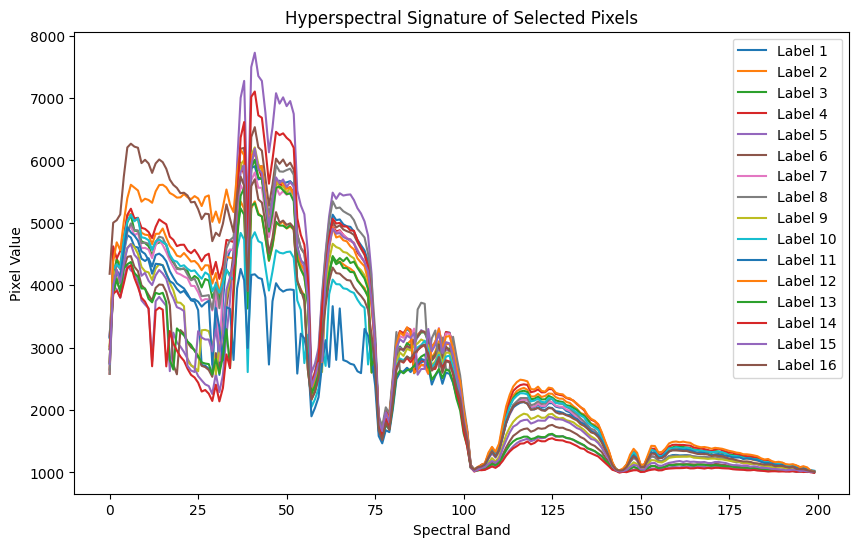

In [19]:
# Plot the hyperspectral signature of the selected pixels
plt.figure(figsize=(10, 6))

for label, random_pixel in random_pixels_by_label.items():
    plt.plot(random_pixel, label=f"Label {label}")

plt.title("Hyperspectral Signature of Selected Pixels")
plt.xlabel("Spectral Band")
plt.ylabel("Pixel Value")
plt.legend()
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

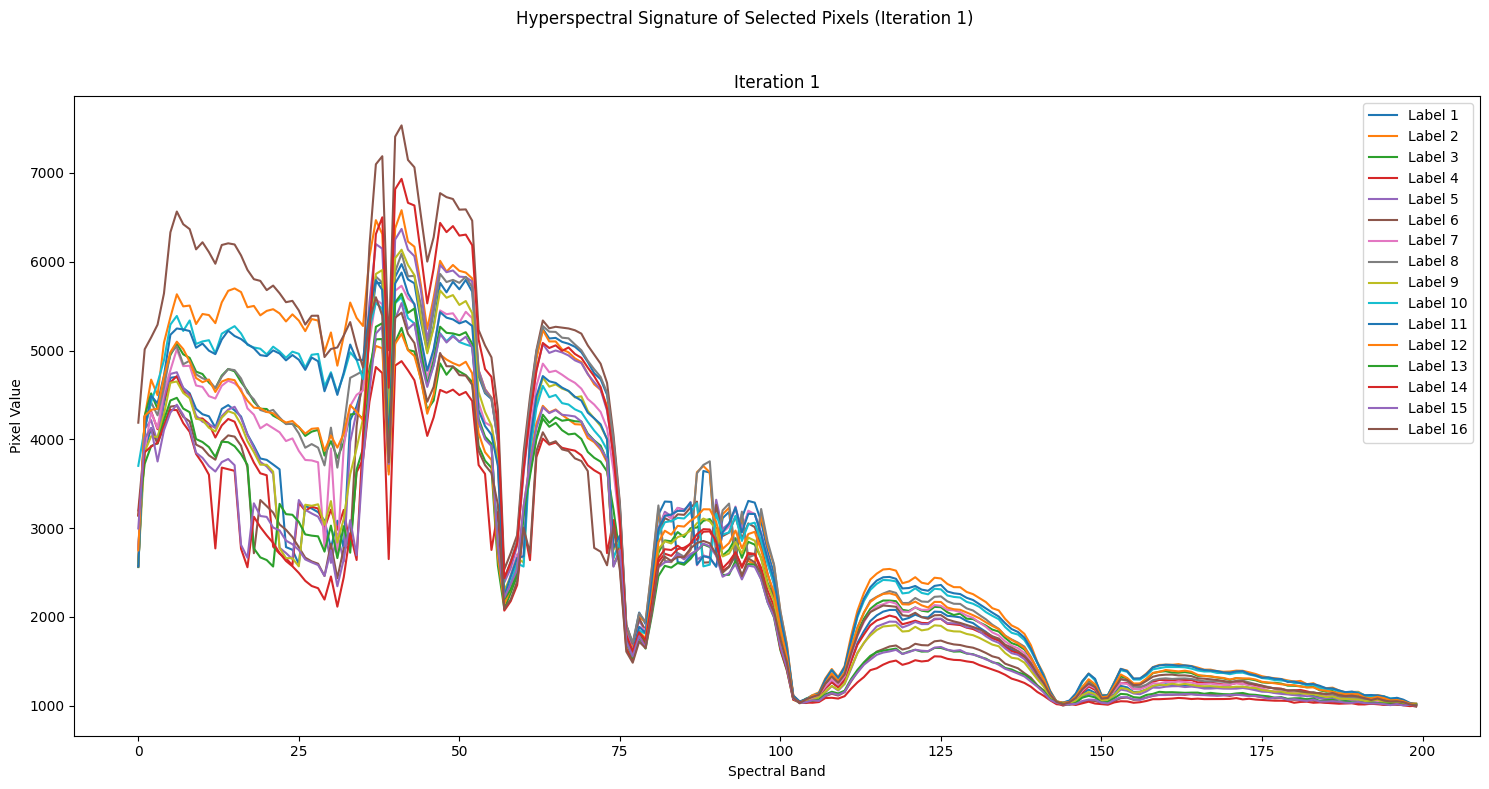

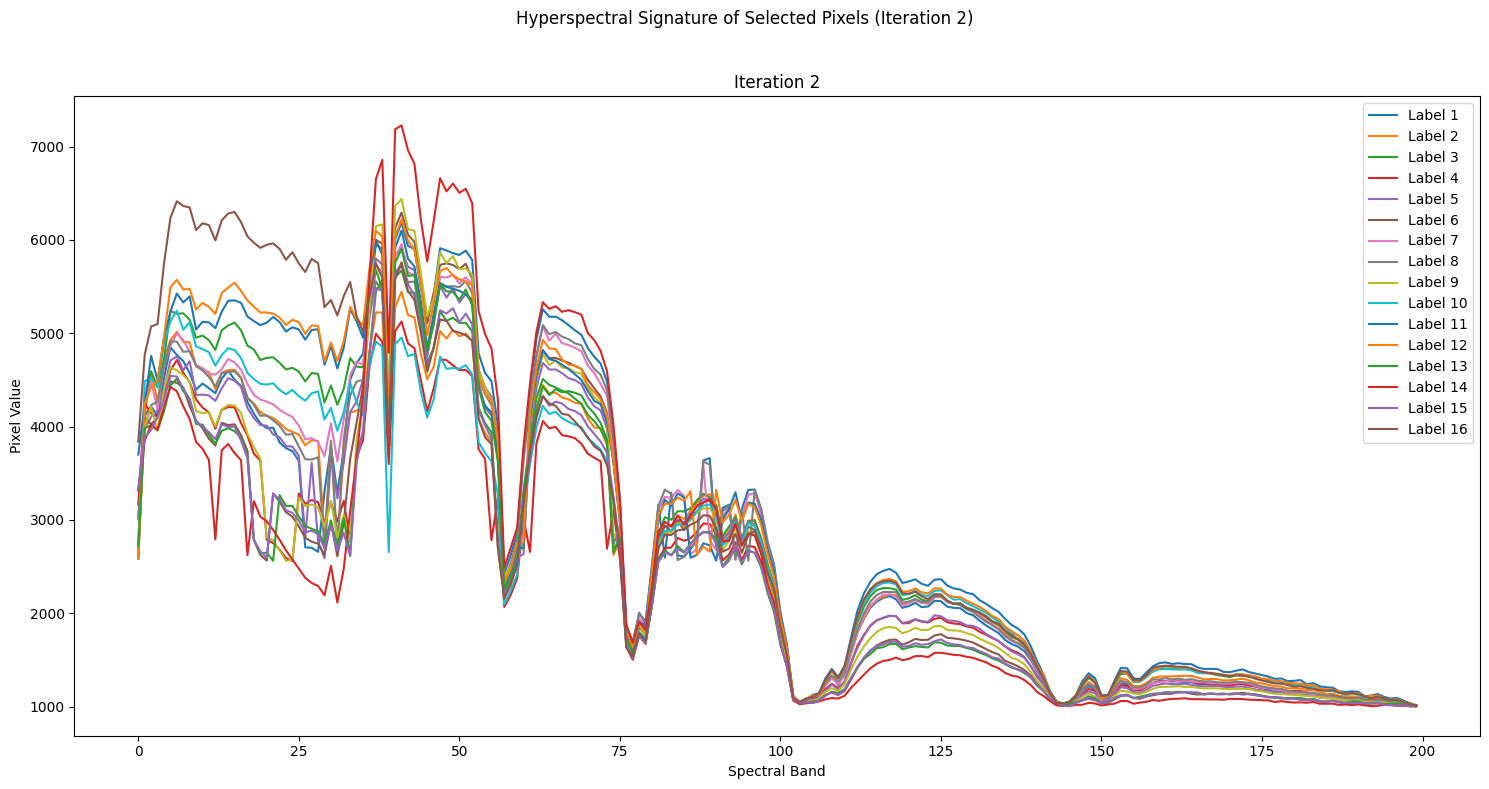

In [20]:
# Define a seed for reproducibility
seed_value = 42

# Find unique labels in the filtered annotations data
unique_labels = np.unique(filtered_annotations_data)

# Initialize a dictionary to store randomly selected pixels for each label
random_pixels_by_label_list = []

# Repeat the process two more times
for _ in range(2):
    random_pixels_by_label = {}

    # Select a random pixel for each label
    for label in unique_labels:
        # Find indices where the label occurs
        label_indices = np.where(filtered_annotations_data == label)[0]

        # Select a random index
        random_index = random.choice(label_indices)

        # Retrieve the corresponding pixel from the filtered image data
        random_pixel = filtered_image_data[random_index]

        # Store the random pixel for the label
        random_pixels_by_label[label] = random_pixel

    random_pixels_by_label_list.append(random_pixels_by_label)

# Plot the hyperspectral signature of the selected pixels for each iteration
for i, random_pixels_by_label in enumerate(random_pixels_by_label_list, 1):
    plt.figure(figsize=(15, 8))

    for label, random_pixel in random_pixels_by_label.items():
        plt.plot(random_pixel, label=f"Label {label}")

    plt.title(f"Iteration {i}")
    plt.xlabel("Spectral Band")
    plt.ylabel("Pixel Value")
    plt.legend()

    plt.suptitle(f"Hyperspectral Signature of Selected Pixels (Iteration {i})")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;


Τα διαγράμματα φασματικής υπογραφής δείχνουν τη φασματική απόκριση για διαφορετικές ετικέτες, οι οποίες θα μπορούσαν να αντιστοιχούν σε διαφορετικούς τύπους καλλιεργειών ή κάλυψη γης. Με βάση τις φασματικές υπογραφές:

1. **Διακρισιμότητα των καλλιεργειών**:
   - Ορισμένες ετικέτες φαίνεται να έχουν μοναδικές φασματικές υπογραφές που διαφέρουν από τις άλλες, ειδικά σε συγκεκριμένες φασματικές ζώνες. Για παράδειγμα, εάν μια ετικέτα δείχνει μια κορυφή ή μια κατώτατη γραμμή που δεν υπάρχει στις άλλες, αυτό μπορεί να χρησιμοποιηθεί για τη διάκριση της συγκεκριμένης καλλιέργειας από τις υπόλοιπες.
   - Οι επικαλυπτόμενες γραμμές στο γράφημα υποδεικνύουν παρόμοιες φασματικές υπογραφές, γεγονός που υποδηλώνει ότι αυτές οι καλλιέργειες θα ήταν πιο δύσκολο να διακριθούν μεταξύ τους χρησιμοποιώντας μόνο φασματικά δεδομένα.

2. **Χρησιμότητα των καναλιών**:
   - Ορισμένες φασματικές ζώνες είναι πιο ενημερωτικές από άλλες. Για παράδειγμα, οι ζώνες όπου οι γραμμές αποκλίνουν σημαντικά είναι πολύ ενημερωτικές επειδή αντιπροσωπεύουν μήκη κύματος όπου οι καλλιέργειες έχουν πολύ διαφορετικές ιδιότητες ανάκλασης.
   - Τα κανάλια όπου όλες ή οι περισσότερες από τις υπογραφές επικαλύπτονται δεν παρέχουν χρήσιμες πληροφορίες για τη διάκριση μεταξύ των καλλιεργειών, επειδή η φασματική απόκριση είναι πολύ παρόμοια σε διαφορετικές ετικέτες.

Από τα γραφήματα, μπορούμε να παρατηρήσουμε ότι:
- Σε ορισμένες μπάντες, οι υπογραφές είναι καλά διαχωρισμένες, κάτι που θα βοηθούσε στη διάκριση μεταξύ αυτών των συγκεκριμένων καλλιεργειών.
- Υπάρχουν περιοχές όπου οι υπογραφές αλληλεπικαλύπτονται σημαντικά, υποδεικνύοντας ότι αυτές οι ζώνες είναι λιγότερο χρήσιμες για διαφοροποίηση.

Συμπερασματικά, ορισμένες καλλιέργειες είναι πράγματι πιο εύκολα διακριτές από άλλες με βάση τις φασματικές υπογραφές τους, ειδικά σε ζώνες όπου οι υπογραφές είναι μοναδικές. Ωστόσο, δεν παρέχουν όλα τα κανάλια χρήσιμες πληροφορίες για τη διάσπαση. Το κλειδί για την αποτελεσματική ταξινόμηση των καλλιεργειών θα ήταν να εντοπιστούν εκείνες οι φασματικές ζώνες που παρέχουν τη μεγαλύτερη διακριτική ισχύ και να χρησιμοποιηθούν στους αλγόριθμους ταξινόμησης. Τα κανάλια που εμφανίζουν υψηλό βαθμό επικάλυψης μπορεί να είναι λιγότερο χρήσιμα και θα μπορούσαν ενδεχομένως να παραλειφθούν για τη μείωση της διαστάσεων και της υπολογιστικής πολυπλοκότητας χωρίς να επηρεαστεί σημαντικά η ακρίβεια ταξινόμησης.




3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

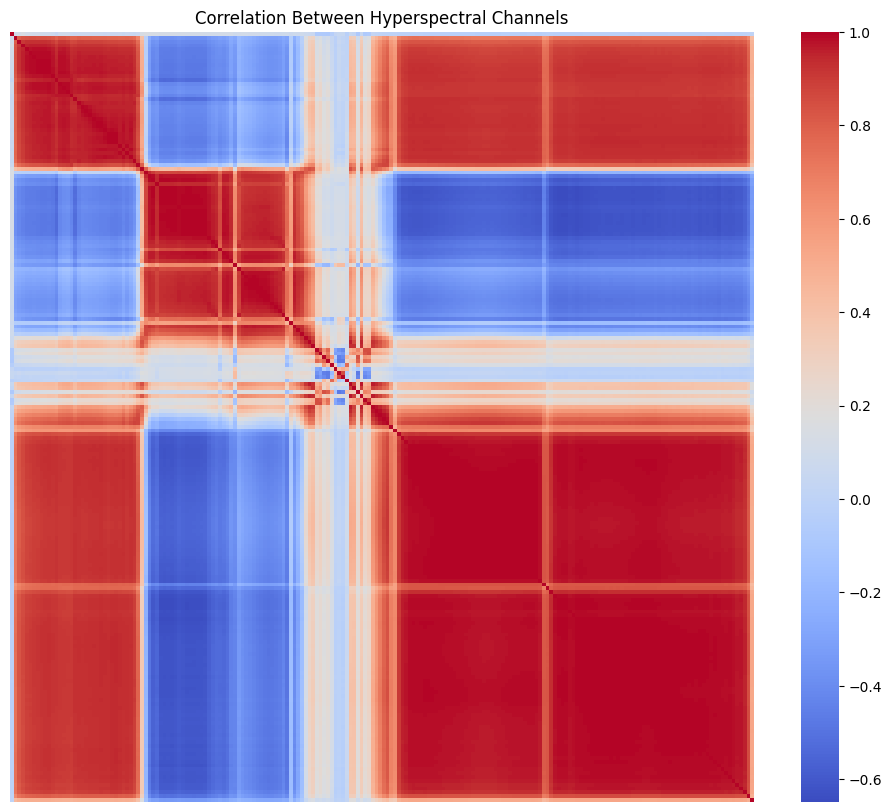

In [21]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(filtered_image_data, rowvar=False)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Correlation Between Hyperspectral Channels")
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [22]:
from sklearn.cluster import KMeans

# Apply k-Means clustering
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels = kmeans.fit_predict(filtered_image_data)

# Reshape the labels to the original image shape
labels_2d = predicted_labels.reshape(filtered_image_data.shape[:-1])




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [23]:
!pip install munkres
from munkres import Munkres
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

def make_cost_matrix(c1, c2):
    uc1, counts1 = np.unique(c1, return_counts=True)
    uc2, counts2 = np.unique(c2, return_counts=True)

    l1 = uc1.size
    l2 = uc2.size

    m = np.ones([l1, l2])

    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i, j] = -m_ij.size

    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y


# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes
# Translate predicted labels to match the original annotations
# Translate predicted labels to match the original annotations

# Translate predicted labels to match the original annotations
translated_labels = translate_predicted_labels(labels_2d, filtered_annotations_data)

# Compute metrics
accuracy_metric = accuracy_score(filtered_annotations_data-1, translated_labels)
rand_score_metric = adjusted_rand_score(filtered_annotations_data, labels_2d)
silhouette_avg = silhouette_score(filtered_image_data, labels_2d)

# Print the computed metrics
print("Accuracy Score:", accuracy_metric)
print("Rand Score:", rand_score_metric)
print("Silhouette Score:", silhouette_avg)


map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy Score: 0.3554493121280125
Rand Score: 0.205184479919157
Silhouette Score: 0.2821754627335447


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

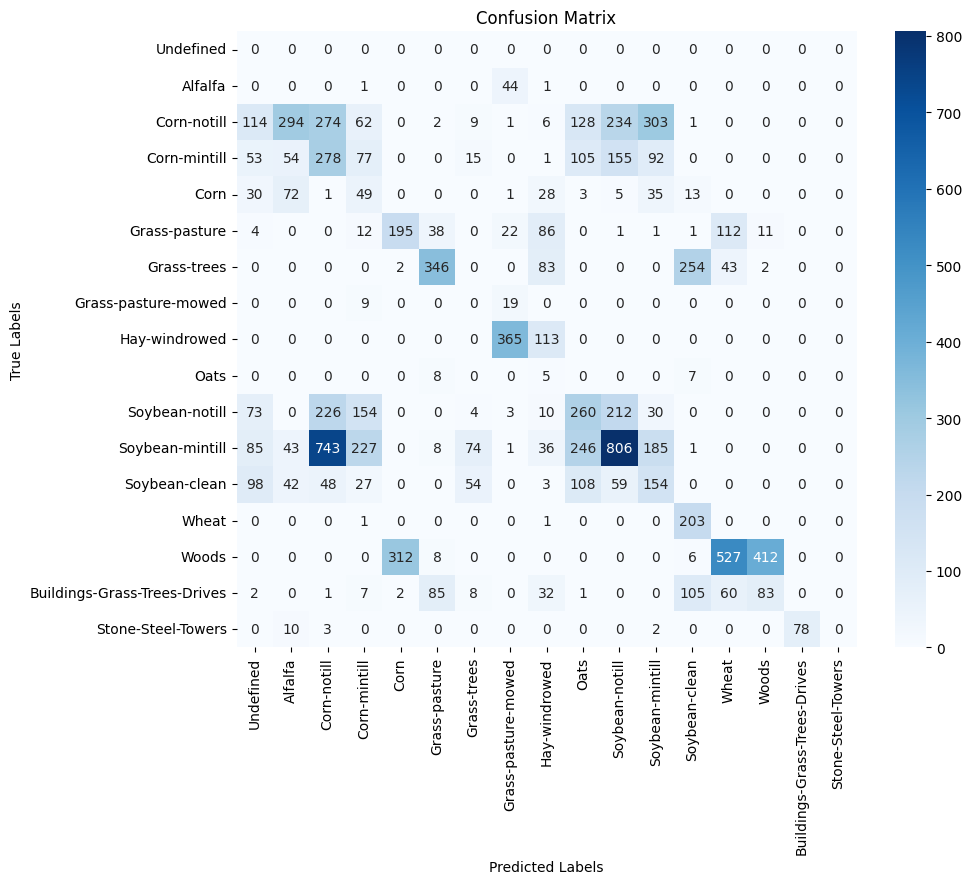

In [24]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix using the matched predicted labels
conf_matrix = confusion_matrix(filtered_annotations_data, translated_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

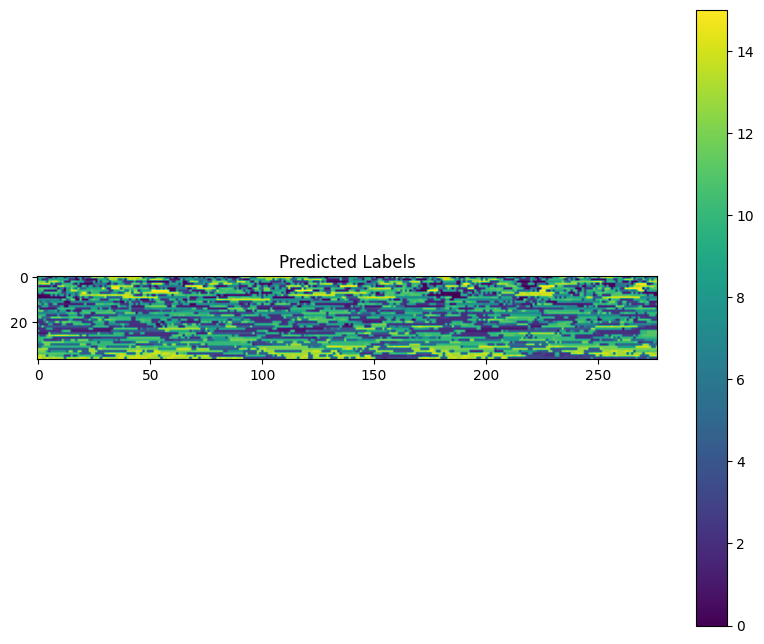

In [25]:
# Reshape the predicted labels to the shape of the original image
predicted_labels_image = translated_labels.reshape(37, 277)

# Plot the predicted labels
plt.figure(figsize=(10, 8))
plt.imshow(predicted_labels_image, cmap='viridis')  # You can choose a different colormap if needed
plt.colorbar()
plt.title('Predicted Labels')
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [26]:
from sklearn.decomposition import PCA

# Apply PCA with n_components=3
n_components = 3
pca = PCA(n_components=n_components, random_state=42)
image_data_pca = pca.fit_transform(filtered_image_data)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Display the cumulative explained variance ratio
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

Explained Variance Ratio: [0.66452713 0.2654258  0.01206197]
Cumulative Explained Variance Ratio: [0.66452713 0.92995292 0.9420149 ]


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [27]:
# Sum the explained variance ratios for the first three components
percentage_variance_retained = explained_variance_ratio[:3].sum() * 100

# Print the result
print(f"Percentage of Data Variance Retained with n_components=3: {percentage_variance_retained:.2f}%")


Percentage of Data Variance Retained with n_components=3: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [28]:
from sklearn.cluster import KMeans

# Apply k-Means clustering to the reduced dimensionality data
kmeans_pca = KMeans(n_clusters=16, random_state=42)
predicted_labels_pca = kmeans_pca.fit_predict(image_data_pca)

# Translate predicted labels to match the original annotations
translated_labels_pca = translate_predicted_labels(predicted_labels_pca, filtered_annotations_data)

# Compute metrics
accuracy_metric_pca = accuracy_score(filtered_annotations_data-1, translated_labels_pca)
rand_score_metric_pca = adjusted_rand_score(filtered_annotations_data, predicted_labels_pca)
silhouette_avg_pca = silhouette_score(image_data_pca, predicted_labels_pca)

# Print the computed metrics for PCA reduced data
print("Metrics for PCA Reduced Data:")
print("Accuracy Score:", accuracy_metric_pca)
print("Rand Score:", rand_score_metric_pca)
print("Silhouette Score:", silhouette_avg_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5
Metrics for PCA Reduced Data:
Accuracy Score: 0.3450092691969948
Rand Score: 0.20159043693986198
Silhouette Score: 0.37462521929900516


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 1
map: 6 --> 6
map: 7 --> 2
map: 8 --> 14
map: 9 --> 11
map: 10 --> 12
map: 11 --> 8
map: 12 --> 3
map: 13 --> 7
map: 14 --> 15
map: 15 --> 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 3
map: 2 --> 6
map: 3 --> 1
map: 4 --> 11
map: 5 --> 9
map: 6 --> 12
map: 7 --> 5
map: 8 --> 10
map: 9 --> 8
map: 10 --> 7
map: 11 --> 2
map: 12 --> 14
map: 13 --> 4
map: 14 --> 0
map: 15 --> 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13


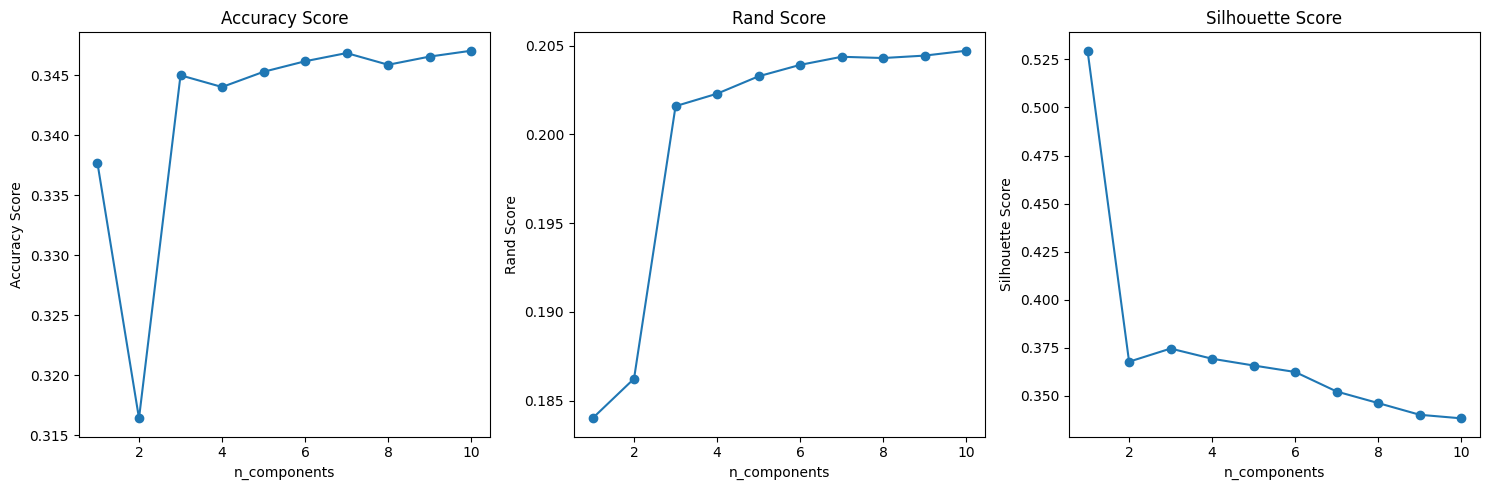

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

# Function to run k-Means for different n_components
def run_kmeans_and_calculate_metrics(data, annotations_data, n_components_range):
    accuracy_scores = []
    rand_scores = []
    silhouette_scores = []

    for n_components in n_components_range:
        # Apply PCA with the current n_components
        pca = PCA(n_components=n_components, random_state=42)
        data_pca = pca.fit_transform(data)

        # Apply k-Means clustering to the reduced dimensionality data
        kmeans_pca = KMeans(n_clusters=16, random_state=42)
        predicted_labels_pca = kmeans_pca.fit_predict(data_pca)

        # Translate predicted labels to match the original annotations
        translated_labels_pca = translate_predicted_labels(predicted_labels_pca, annotations_data)

        # Compute metrics
        accuracy_metric_pca = accuracy_score(annotations_data-1, translated_labels_pca)
        rand_score_metric_pca = adjusted_rand_score(annotations_data, predicted_labels_pca)
        silhouette_avg_pca = silhouette_score(data_pca, predicted_labels_pca)

        # Append metrics to lists
        accuracy_scores.append(accuracy_metric_pca)
        rand_scores.append(rand_score_metric_pca)
        silhouette_scores.append(silhouette_avg_pca)

    return accuracy_scores, rand_scores, silhouette_scores

# Range of n_components values (from 1 to 10)
n_components_range = range(1, 11)

# Run k-Means for different n_components and calculate metrics
accuracy_scores, rand_scores, silhouette_scores = run_kmeans_and_calculate_metrics(filtered_image_data, filtered_annotations_data, n_components_range)

# Plotting the results
plt.figure(figsize=(15, 5))

# Accuracy Score
plt.subplot(1, 3, 1)
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('Accuracy Score')
plt.xlabel('n_components')
plt.ylabel('Accuracy Score')

# Rand Score
plt.subplot(1, 3, 2)
plt.plot(n_components_range, rand_scores, marker='o')
plt.title('Rand Score')
plt.xlabel('n_components')
plt.ylabel('Rand Score')

# Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Συμπεράσματα:
- Η βουτιά σε `n_components = 2` τόσο στο Accurate Score όσο και στo Silhouette Score υποδηλώνει ότι η ύπαρξη μόνο δύο components δεν είναι βέλτιστη για τα δεδομένα.
- Η αύξηση και η επακόλουθη σταθεροποίηση του Accurate Score υποδηλώνει ότι μπορεί να υπάρχει ένα ιδανικό σημείο για τον αριθμό των components όπου η λύση γίνεται σταθερή.
- Η συνεχής αύξηση του Rand Score υποδηλώνει ότι τα συμπλέγματα γίνονται πιο ευδιάκριτα καθώς χρησιμοποιούνται περισσότερα.
- To Silhouette Score υποδηλώνει ότι υπάρχει μια αντιστάθμιση μεταξύ της συνοχής συμπλέγματος και του διαχωρισμού καθώς αυξάνεται o αριθμός των στοιχείων.

Στην πράξη, η επιλογή του n_components θα εξαρτιόταν από την εξισορρόπηση αυτών των μετρήσεων μαζί με τη γνώση του τομέα των δεδομένων. To clustering χρησιμοποιείται συχνά σε συνδυασμό με τo Silhouette Score για να βρεθεί το βέλτιστος n_components, αναζητώντας ένα σημείο όπου η μέτρηση αρχίζει να μειώνεται με πιο αργό ρυθμό. Σε αυτήν την περίπτωση, με βάση μόνο αυτά τα γραφήματα, φαίνεται ότι ένας αριθμός στοιχείων υψηλότερο από 2 αλλά όχι απαραίτητα τόσο υψηλό όσο το 10 μπορεί να είναι κατάλληλος, καθώς τα Accurate Score και Rand Score παρουσιάζουν βελτίωση και στη συνέχεια σταθεροποιούνται, ενώ το Silhouette Score αρχίζει να μειώνεται πιο αργά μετά από μια αρχική πτώση. Ωστόσο, o ακριβής καλύτερος αριθμός στοιχείων θα χρειαζόταν περαιτέρω ανάλυση, δυνητικά εξετάζοντας τα πραγματικά ομαδοποιημένα δεδομένα και λαμβάνοντας υπόψη το πλαίσιο του συνόλου δεδομένων.





